In [0]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [0]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

In [3]:
# Importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc2


In this project we used the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

The 10 categories are ------
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt',  'Sneaker', 'Bag', 'Ankle boot'

On the basis of this categories we are going to create our model.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. We will access the Fashion MNIST directly from TensorFlow.

In [4]:
# Importing fashion_mnist dataset form keras

fashion_mnist = keras.datasets.fashion_mnist

# traning dataset and testing dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Assinging the column names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring the data

For Training dataset

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9, which represents the categories.

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

For Testing dataset

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)


10000

# Preprocessing the data

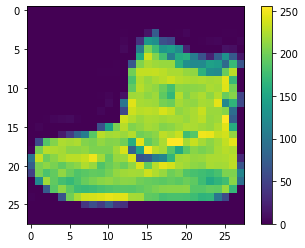

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

From the above image in the training set, we can see that the pixel values fall in the range of 0 to 255.

So we will Scale the values to a range of 0 to 1 before feeding them to the neural network model. To do so, we will divide the values by 255.


In [0]:
# Scaling

train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that we are ready to build and train the network, let's display the first 20 images from the training set and display the class name below each image.

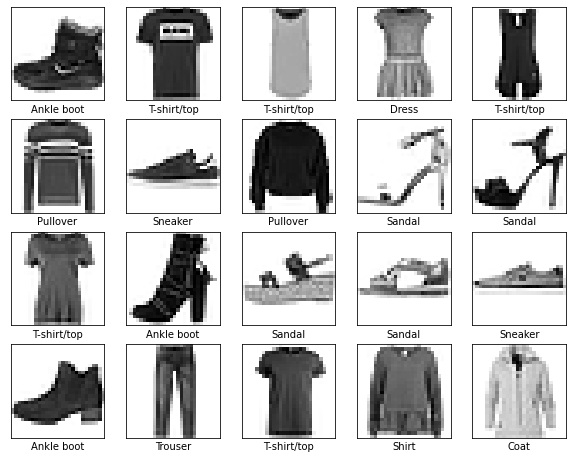

In [13]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the model

To build our model we created 3 layers

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compiling the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You     want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model

In [16]:
# Fitting the our model according to the training dataset. We iterate this process 10 times to increase our model performance.

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3379 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [17]:
# Evaluating the model accuracy

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3342 - accuracy: 0.8864

Test accuracy: 0.8863999843597412


# Making predictions

The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

Logits --- The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In addition, logits sometimes refer to the element-wise inverse of the sigmoid function.

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([2.4560851e-08, 8.5693875e-07, 3.7545881e-08, 6.4409317e-10,
       1.8055335e-08, 9.6810227e-03, 4.5361571e-07, 5.0978199e-02,
       2.5224281e-08, 9.3933940e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

As our predicted output and actual output are same, it shows that our model working properly.

By using the below functions we will graph the output to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verifing predictions

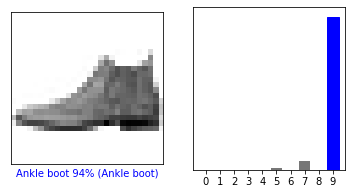

In [24]:
# Let's look at the 0th image, predictions, and prediction array. 
# Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percentage (out of 100) for the predicted label.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

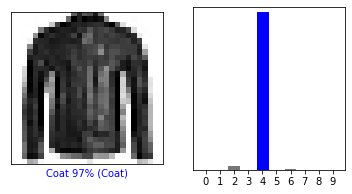

In [25]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

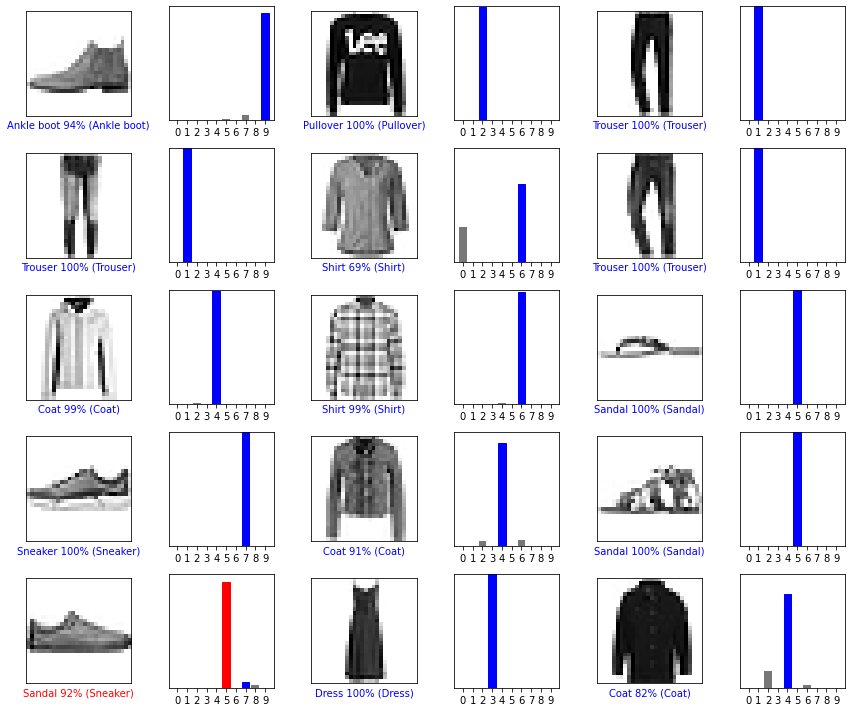

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Using the trained model for testing dataset

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though we are using a single image, we need to add it to a list.

In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


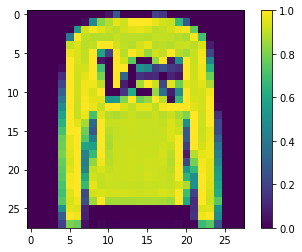

In [30]:
# Checking the first image in testing dataset

plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
# Predicting the correct label for these images.

predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.5402240e-06 1.4565617e-13 9.9532062e-01 3.9213181e-12 1.9850789e-03
  3.6058049e-15 2.6867287e-03 3.9478515e-21 1.1103726e-12 3.2862378e-14]]


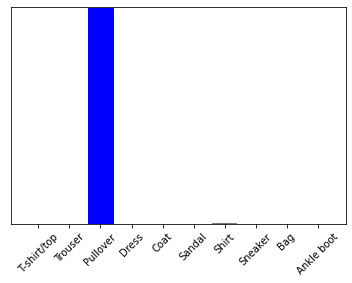

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

2